In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata as ud
import re
import string

# Reading in the dataset

In [173]:
df = pd.read_csv("./dataset.tsv", delimiter="\t", names = ["category", "text"])

In [174]:
df.head()

,category,text
0,Negative,Enna da ellam avan seyal Mari iruku
1,Negative,This movei is just like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...
3,Positive,Neraya neraya neraya... ... V era level...thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...


In [175]:
df.shape

(15744, 2)

# Remvoing non ascii rows

In [176]:
def is_latin(text): 
    from string import printable
    return not bool(set(text) - set(printable)) 

In [177]:
count = 0
for _, row in df.iterrows():
    if not is_latin(row["text"]):
        count += 1
print(1 - count/len(df))

0.9340701219512195


In [178]:
df["text"].apply(is_latin).value_counts()

True     14706
False     1038
Name: text, dtype: int64

In [179]:
df["is_latin"] = df.apply(lambda x: is_latin(x["text"]), axis=1)

In [180]:
df = df.loc[df["is_latin"]]

In [181]:
df.head()

,category,text,is_latin
0,Negative,Enna da ellam avan seyal Mari iruku,True
1,Negative,This movei is just like ellam avan seyal,True
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...,True
3,Positive,Neraya neraya neraya... ... V era level...thala,True
4,Positive,wow thavala sema mass....padam oru pundaikum ...,True


In [182]:

df["text"].apply(is_latin).value_counts()

True    14706
Name: text, dtype: int64

In [183]:
df.drop(columns=["is_latin"], inplace=True)

In [184]:
df.head()

,category,text
0,Negative,Enna da ellam avan seyal Mari iruku
1,Negative,This movei is just like ellam avan seyal
2,Positive,Padam vanthathum 13k dislike pottavaga yellam...
3,Positive,Neraya neraya neraya... ... V era level...thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...


In [185]:
df.shape

(14706, 2)

# Removing non-Tamil sentences

<Axes: xlabel='category', ylabel='Count'>

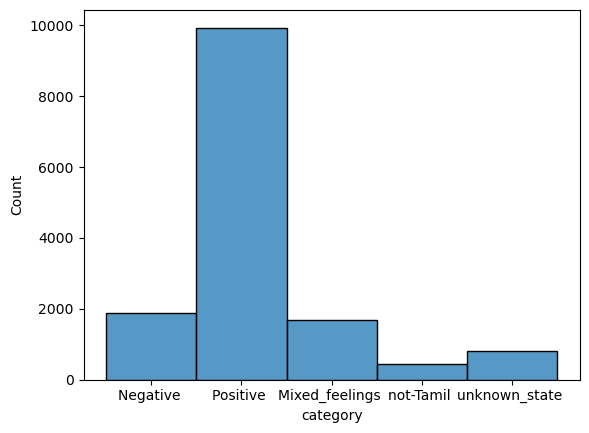

In [186]:
sns.histplot(data=df, x="category")

In [187]:
df["category"].value_counts()

Positive           9935
Negative           1870
Mixed_feelings     1676
unknown_state       798
not-Tamil           427
Name: category, dtype: int64

In [188]:
df["category"] = df["category"].str.strip()

In [189]:
df = df[df["category"] != "not-Tamil"]

In [190]:
df["category"].value_counts()

Positive          9935
Negative          1870
Mixed_feelings    1676
unknown_state      798
Name: category, dtype: int64

# Converting everything to lowercase

In [191]:
df["text"] = df["text"].str.lower()

In [192]:
df.head()

,category,text
0,Negative,enna da ellam avan seyal mari iruku
1,Negative,this movei is just like ellam avan seyal
2,Positive,padam vanthathum 13k dislike pottavaga yellam...
3,Positive,neraya neraya neraya... ... v era level...thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...


In [198]:
# Remove numbers and words likes '13k' 'r45'
df["text"].apply(lambda x: re.sub(r"\w*\d+\w*", "", x))

0                     enna da ellam avan seyal  mari iruku
1                this movei is just like  ellam avan seyal
2         padam vanthathum  dislike pottavaga yellam ye...
3          neraya neraya neraya... ... v era level...thala
4         wow thavala sema mass....padam oru pundaikum ...
                               ...                        
15738                           again  rajni sir cute look
15739     ivaru cinemala laam nalla tha prasuraaru...aa...
15740     pattaya kilaputhupaa trailer... !!!!! get raj...
15741     en innum trending la varala? ennada panringa ...
15743     enagada youtube inum trending la add panama i...
Name: text, Length: 14279, dtype: object

In [199]:
df["text"] = df["text"].apply(lambda x: re.sub(r"\w*\d+\w*", "", x))

In [201]:
df.head()

,category,text
0,Negative,enna da ellam avan seyal mari iruku
1,Negative,this movei is just like ellam avan seyal
2,Positive,padam vanthathum dislike pottavaga yellam ye...
3,Positive,neraya neraya neraya... ... v era level...thala
4,Positive,wow thavala sema mass....padam oru pundaikum ...


# Convert multiple whitespaces to single

In [203]:
df["text"].apply(lambda x: " ".join(x.split()))

0                      enna da ellam avan seyal mari iruku
1                 this movei is just like ellam avan seyal
2        padam vanthathum dislike pottavaga yellam yea ...
3          neraya neraya neraya... ... v era level...thala
4        wow thavala sema mass....padam oru pundaikum a...
                               ...                        
15738                            again rajni sir cute look
15739    ivaru cinemala laam nalla tha prasuraaru...aan...
15740    pattaya kilaputhupaa trailer... !!!!! get rajn...
15741    en innum trending la varala? ennada panringa y...
15743    enagada youtube inum trending la add panama ir...
Name: text, Length: 14279, dtype: object

In [204]:
df["text"] = df["text"].apply(lambda x: " ".join(x.split()))

# Remove punctuation

In [206]:
df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

0                      enna da ellam avan seyal mari iruku
1                 this movei is just like ellam avan seyal
2        padam vanthathum dislike pottavaga yellam yea ...
3                   neraya neraya neraya  v era levelthala
4         wow thavala sema masspadam oru pundaikum aagathu
                               ...                        
15738                            again rajni sir cute look
15739    ivaru cinemala laam nalla tha prasuraaruaana n...
15740         pattaya kilaputhupaa trailer  get rajnified 
15741    en innum trending la varala ennada panringa yo...
15743    enagada youtube inum trending la add panama ir...
Name: text, Length: 14279, dtype: object

In [207]:
df["text"] = df["text"].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)))

In [208]:
df.head()

,category,text
0,Negative,enna da ellam avan seyal mari iruku
1,Negative,this movei is just like ellam avan seyal
2,Positive,padam vanthathum dislike pottavaga yellam yea ...
3,Positive,neraya neraya neraya v era levelthala
4,Positive,wow thavala sema masspadam oru pundaikum aagathu
